In [1]:

!nvidia-smi


!pip install -q ultralytics==8.3.78
!pip install -q roboflow


Sat Oct 25 15:31:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
from roboflow import Roboflow

rf = Roboflow(api_key="ZuMYBQrb4X92dbJLfs1k")
project = rf.workspace("task-object-detection").project("watch-93jet-tlotn")



loading Roboflow workspace...
loading Roboflow project...


In [3]:
version = project.version(1)
dataset = version.download("yolov12")

print(" Dataset downloaded successfully!")

 Dataset downloaded successfully!


In [4]:
!pip install -q roboflow
!git clone https://github.com/sunsmarterjie/yolov12.git
%cd yolov12

fatal: destination path 'yolov12' already exists and is not an empty directory.
/content/yolov12


In [5]:
!pip install -q torch torchvision torchaudio
!pip install -q xformers
!pip install -U ultralytics

  Using cached ultralytics-8.3.221-py3-none-any.whl.metadata (37 kB)
Using cached ultralytics-8.3.221-py3-none-any.whl (1.1 MB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.78
    Uninstalling ultralytics-8.3.78:
      Successfully uninstalled ultralytics-8.3.78


In [6]:
from ultralytics import YOLO


model = YOLO("yolov12n.yaml")

print(" YOLOv12 model initialized successfully!")

FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
 YOLOv12 model initialized successfully!


In [7]:
from ultralytics import YOLO

model = YOLO("ultralytics/cfg/models/v12/yolov12n.yaml")



In [10]:
results = model.train(
    data="../Watch-1/data.yaml",
    epochs=50,
    imgsz=640,
    batch=8,
    device=0
)

New https://pypi.org/project/ultralytics/8.3.221 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=ultralytics/cfg/models/v12/yolov12n.yaml, data=../Watch-1/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sh

100%|██████████| 755k/755k [00:00<00:00, 25.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      2368  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2, 1, 2]          
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1      9344  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2, 1, 4]          
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  2    174720  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    295424  ultralytics

100%|██████████| 5.26M/5.26M [00:00<00:00, 105MB/s]


AMP: checks passed ✅


train: Scanning /content/Watch-1/train/labels... 3205 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3205/3205 [00:01<00:00, 2525.49it/s]


train: New cache created: /content/Watch-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 36, len(boxes) = 4477. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/Watch-1/valid/labels... 104 images, 0 backgrounds, 0 corrupt: 100%|██████████| 104/104 [00:00<00:00, 1281.84it/s]

val: New cache created: /content/Watch-1/valid/labels.cache


Plotting labels to /content/yolov12/runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/yolov12/runs/detect/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.07G      3.007      3.427      3.846          7        640: 100%|██████████| 401/401 [01:55<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.28s/it]

                   all        104        146      0.189      0.103      0.069     0.0177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.99G      2.505       2.99      3.117         14        640: 100%|██████████| 401/401 [01:27<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.41it/s]

                   all        104        146      0.408      0.158      0.137     0.0354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         2G      2.238      2.628      2.798         10        640: 100%|██████████| 401/401 [01:26<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.72it/s]

                   all        104        146        0.1       0.13     0.0392     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         2G      2.076       2.39      2.576         14        640: 100%|██████████| 401/401 [01:27<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.63it/s]

                   all        104        146      0.403      0.301      0.267     0.0672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         2G      1.953      2.254      2.419         15        640: 100%|██████████| 401/401 [01:25<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.68it/s]

                   all        104        146      0.416      0.425      0.323     0.0994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         2G      1.846      2.093      2.298         18        640: 100%|██████████| 401/401 [01:27<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.57it/s]

                   all        104        146      0.495      0.342      0.399      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         2G      1.794      2.017      2.238         17        640: 100%|██████████| 401/401 [01:25<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.65it/s]

                   all        104        146      0.567      0.473      0.509      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         2G      1.749      1.943      2.179         27        640: 100%|██████████| 401/401 [01:26<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.68it/s]

                   all        104        146      0.503      0.473      0.478      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         2G      1.691      1.881      2.123          9        640: 100%|██████████| 401/401 [01:27<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.59it/s]

                   all        104        146      0.544      0.418       0.45      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.99G      1.666       1.86      2.085         15        640: 100%|██████████| 401/401 [01:26<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.86it/s]

                   all        104        146      0.417      0.514      0.443      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.99G      1.625      1.809      2.045         11        640: 100%|██████████| 401/401 [01:27<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.57it/s]

                   all        104        146      0.573      0.507      0.581      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         2G       1.61      1.762      2.026         10        640: 100%|██████████| 401/401 [01:27<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.61it/s]

                   all        104        146      0.538      0.582      0.553      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         2G      1.568      1.726      1.986         13        640: 100%|██████████| 401/401 [01:25<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.76it/s]

                   all        104        146      0.595      0.514      0.567      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         2G      1.553      1.696      1.961         10        640: 100%|██████████| 401/401 [01:27<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.85it/s]

                   all        104        146      0.553      0.589      0.599      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         2G      1.512      1.645      1.935         17        640: 100%|██████████| 401/401 [01:26<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.60it/s]

                   all        104        146      0.594      0.637      0.645      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         2G       1.51      1.628      1.923         12        640: 100%|██████████| 401/401 [01:27<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.67it/s]

                   all        104        146      0.575      0.511       0.56      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         2G      1.488        1.6      1.898         23        640: 100%|██████████| 401/401 [01:27<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.66it/s]

                   all        104        146      0.531      0.612      0.567        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.99G      1.475      1.607       1.89          8        640: 100%|██████████| 401/401 [01:26<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.69it/s]

                   all        104        146       0.59       0.61      0.648      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.99G      1.455       1.57      1.874         11        640: 100%|██████████| 401/401 [01:27<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.77it/s]

                   all        104        146      0.699      0.541      0.627      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         2G      1.456      1.563       1.86         14        640: 100%|██████████| 401/401 [01:27<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.78it/s]

                   all        104        146      0.623       0.61      0.637      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         2G      1.446      1.556      1.863         23        640: 100%|██████████| 401/401 [01:27<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.75it/s]

                   all        104        146      0.651      0.603      0.657      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         2G      1.428      1.502      1.842         24        640: 100%|██████████| 401/401 [01:31<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.80it/s]

                   all        104        146      0.601      0.568      0.592        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         2G      1.414      1.498       1.82         16        640: 100%|██████████| 401/401 [01:35<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.77it/s]

                   all        104        146      0.574      0.753      0.683      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         2G      1.418      1.507      1.834         14        640: 100%|██████████| 401/401 [01:29<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.79it/s]

                   all        104        146       0.64       0.61      0.652      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         2G      1.393      1.494       1.81         11        640: 100%|██████████| 401/401 [01:27<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.81it/s]

                   all        104        146       0.51      0.678      0.653      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.99G       1.38      1.475      1.802         22        640: 100%|██████████| 401/401 [01:26<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.81it/s]

                   all        104        146      0.621      0.671      0.676      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.99G       1.39      1.454      1.802         22        640: 100%|██████████| 401/401 [01:27<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.81it/s]

                   all        104        146      0.665      0.664      0.699      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         2G      1.348      1.451      1.767         15        640: 100%|██████████| 401/401 [01:27<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.72it/s]

                   all        104        146      0.639      0.658      0.686      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         2G      1.349      1.421      1.768         16        640: 100%|██████████| 401/401 [01:27<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.92it/s]

                   all        104        146      0.608      0.616      0.637      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         2G      1.323      1.414      1.753         16        640: 100%|██████████| 401/401 [01:26<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.82it/s]

                   all        104        146      0.704      0.636      0.721      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         2G      1.363      1.427      1.773         21        640: 100%|██████████| 401/401 [01:26<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.68it/s]

                   all        104        146       0.62       0.61      0.639      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         2G      1.327      1.401      1.742         19        640: 100%|██████████| 401/401 [01:27<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.81it/s]

                   all        104        146      0.667       0.63      0.686      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         2G      1.326      1.383      1.744          8        640: 100%|██████████| 401/401 [01:26<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.81it/s]

                   all        104        146      0.643       0.63      0.644      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.99G      1.315      1.372      1.736         32        640: 100%|██████████| 401/401 [01:27<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.69it/s]

                   all        104        146      0.637      0.664      0.678      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.98G      1.297      1.367      1.728         24        640: 100%|██████████| 401/401 [01:27<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.77it/s]

                   all        104        146      0.628      0.649      0.668      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         2G      1.275      1.337      1.711         15        640: 100%|██████████| 401/401 [01:26<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.69it/s]

                   all        104        146      0.675      0.625      0.695      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         2G      1.285      1.347       1.71         21        640: 100%|██████████| 401/401 [01:27<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.71it/s]

                   all        104        146      0.641      0.612       0.66      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         2G      1.278      1.347        1.7         13        640: 100%|██████████| 401/401 [01:25<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.88it/s]

                   all        104        146      0.776      0.651      0.719      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         2G      1.273      1.317      1.702         12        640: 100%|██████████| 401/401 [01:27<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.79it/s]

                   all        104        146      0.708       0.61       0.65      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         2G      1.259      1.314      1.686         12        640: 100%|██████████| 401/401 [01:25<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.72it/s]

                   all        104        146      0.695      0.637      0.685      0.337


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         2G      1.247      1.125      1.805         13        640: 100%|██████████| 401/401 [01:25<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.70it/s]

                   all        104        146       0.68      0.678      0.688      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.99G       1.22      1.069      1.781          8        640: 100%|██████████| 401/401 [01:26<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.94it/s]

                   all        104        146      0.694      0.622      0.687      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.99G      1.203      1.025      1.754          6        640: 100%|██████████| 401/401 [01:25<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.87it/s]

                   all        104        146       0.62      0.669      0.687      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         2G      1.176      1.023      1.736          8        640: 100%|██████████| 401/401 [01:26<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.80it/s]

                   all        104        146      0.609      0.685       0.69      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         2G      1.154     0.9999      1.712          5        640: 100%|██████████| 401/401 [01:25<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.77it/s]

                   all        104        146       0.65      0.663        0.7      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         2G      1.142     0.9807      1.707          6        640: 100%|██████████| 401/401 [01:27<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.57it/s]

                   all        104        146      0.664      0.664      0.683      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         2G       1.13     0.9684      1.682          5        640: 100%|██████████| 401/401 [01:27<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.79it/s]

                   all        104        146      0.632      0.692      0.716      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         2G      1.129      0.956      1.681          7        640: 100%|██████████| 401/401 [01:25<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.85it/s]

                   all        104        146      0.659      0.623      0.707      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         2G       1.12     0.9475      1.673          5        640: 100%|██████████| 401/401 [01:26<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.89it/s]

                   all        104        146      0.648      0.693      0.713      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.99G      1.101     0.9353       1.66         14        640: 100%|██████████| 401/401 [01:25<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.71it/s]

                   all        104        146      0.659      0.678      0.716      0.383



50 epochs completed in 1.247 hours.
Optimizer stripped from /content/yolov12/runs/detect/train5/weights/last.pt, 5.4MB
Optimizer stripped from /content/yolov12/runs/detect/train5/weights/best.pt, 5.4MB

Validating /content/yolov12/runs/detect/train5/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 376 layers, 2,508,539 parameters, 0 gradients, 5.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]


                   all        104        146      0.631      0.692      0.717      0.394
Speed: 0.2ms preprocess, 6.3ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to /content/yolov12/runs/detect/train5


In [11]:
metrics = model.val()

Ultralytics 8.3.63 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 376 layers, 2,508,539 parameters, 0 gradients, 5.8 GFLOPs


val: Scanning /content/Watch-1/valid/labels.cache... 104 images, 0 backgrounds, 0 corrupt: 100%|██████████| 104/104 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.28it/s]


                   all        104        146      0.628      0.692      0.716      0.394
Speed: 0.5ms preprocess, 10.4ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to /content/yolov12/runs/detect/train52


In [15]:
from google.colab import files
files.download("runs/detect/train5/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import glob
import matplotlib.pyplot as plt
import cv2


result_images = sorted(glob.glob("runs/detect/train/*.jpg"))[:5]

plt.figure(figsize=(15, 10))
for i, img_path in enumerate(result_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, len(result_images), i + 1)
    plt.imshow(img)
    plt.axis("off")
plt.suptitle(" YOLOv12 Training Results", fontsize=18)
plt.show()


<Figure size 1500x1000 with 0 Axes>

Saving WhatsApp Image 2025-10-25 at 19.48.46_3820fd7b.jpg to WhatsApp Image 2025-10-25 at 19.48.46_3820fd7b.jpg

image 1/1 /content/yolov12/WhatsApp Image 2025-10-25 at 19.48.46_3820fd7b.jpg: 640x480 1 wrist watch - v5 2024-08-11 10-52am, 56.7ms
Speed: 2.4ms preprocess, 56.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/yolov12/runs/detect/predict2
output: /content/yolov12/runs/detect/predict2
output image: /content/yolov12/runs/detect/predict2/WhatsApp Image 2025-10-25 at 19.48.46_3820fd7b.jpg


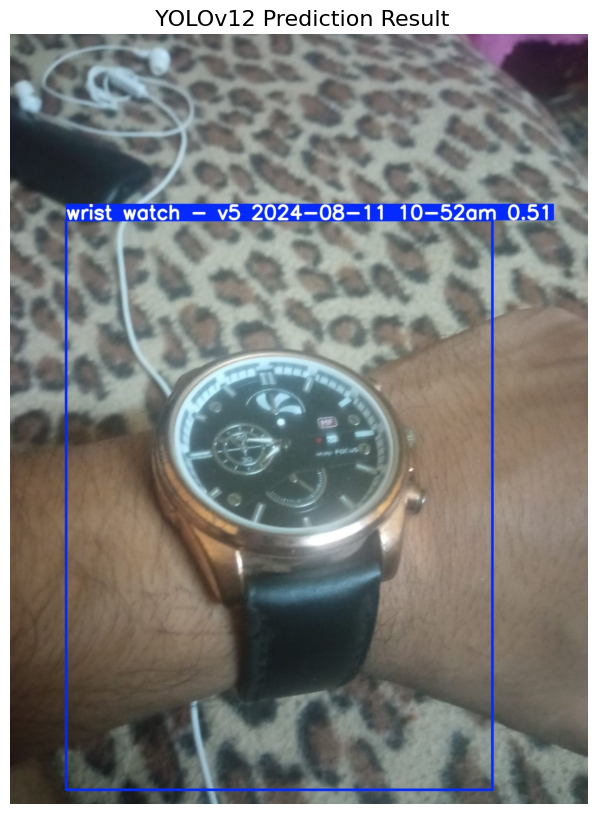

In [22]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import glob
import os
from google.colab import files


model = YOLO("runs/detect/train5/weights/best.pt")


uploaded = files.upload()
image_path = list(uploaded.keys())[0]


results = model.predict(source=image_path, conf=0.4, save=True)


output_dir = results[0].save_dir

print(f"output: {output_dir}")


result_images = glob.glob(os.path.join(output_dir, "*.jpg"))
if len(result_images) == 0:
    result_images = glob.glob(os.path.join(output_dir, "*.png"))


if len(result_images) > 0:
    result_path = result_images[0]
    print(f"output image: {result_path}")


    img = cv2.imread(result_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.title(" YOLOv12 Prediction Result", fontsize=16)
    plt.show()
else:
    print("error")


In [20]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2


model = YOLO("runs/detect/train5/weights/best.pt")

from google.colab import files
uploaded = files.upload()

import os
image_path = list(uploaded.keys())[0]


results = model.predict(source=image_path, show=True, conf=0.4)


img = cv2.imread("runs/detect/predict/" + image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.title(" YOLOv12 Prediction Result", fontsize=16)
plt.show()

Saving Picsart_24-10-14_19-27-57-619.jpg to Picsart_24-10-14_19-27-57-619.jpg
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/yolov12/Picsart_24-10-14_19-27-57-619.jpg: 640x512 3 wrist watch - v5 2024-08-11 10-52ams, 56.5ms
Speed: 3.2ms preprocess, 56.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:

from google.colab import files
uploaded = files.upload()

video_path = list(uploaded.keys())[0]


model.predict(source=video_path, save=True, conf=0.4)


import glob
import IPython.display as display

result_video = glob.glob("runs/detect/predict*/" + video_path)[0]
display.Video(result_video, embed=True)


In [ ]:
model.predict(source=0, show=True)
